#**Poem Classification using QLoRA/Quantized LoRA with Gemma**
This script fine-tunes a Gemma model on a poetry classification task.
It compares 4-bit (QLoRA) vs 8-bit quantization strategies.

In [1]:
!pip install transformers peft accelerate bitsandbytes datasets
!pip install -U bitsandbytes
!pip install pandas scikit-learn matplotlib seaborn
!pip install arabic-reshaper python-bidi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 11.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
train = pd.read_csv('Dataset/Train.csv')
test = pd.read_csv('Dataset/Test.csv')
val=pd.read_csv('Dataset/Val.csv')

train=pd.concat([train,test,val])

In [4]:
train['poet'].value_counts()

,count
poet,
صائب تبریزی,5361
مولانا,5098
مسعود سعد سلمان,669
انوری,606
ناصرخسرو,560
خواجه عبدالله انصاری,535
الیار,397
ایرانشان,368
باباطاهر,367


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16997 non-null  object
 1   cat     17000 non-null  object
 2   poet    17000 non-null  object
dtypes: object(3)
memory usage: 531.2+ KB


In [6]:
!huggingface-cli login

⚠️  Warning: 'huggingface-cli login' is deprecated. Use 'hf auth login' instead.

    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) Y
Token is valid (permission: read).
The token `anlp` has been saved to /root/.cache/huggingface/stored_tokens
Cannot authenticate through git-credential as n

Data loaded successfully. Total rows sampled: 5000

==================== Starting Run: QLoRA_4bit_r8 ====================


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

--> Loading in 4-bit (QLoRA)...


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some weights of Gemma3TextForSequenceClassification were not initialized from the model checkpoint at google/gemma-3-270m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



[Metrics] Trainable Parameters for QLoRA_4bit_r8:
trainable params: 750,080 || all params: 268,861,056 || trainable%: 0.2790


Map:   0%|          | 0/3999 [00:00<?, ? examples/s]

Map:   0%|          | 0/501 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1 Micro,F1 Macro
1,0.668700,0.580803,0.814371,0.814371,0.628423
2,0.419300,0.538747,0.844311,0.844311,0.740021
3,0.239000,0.469165,0.888224,0.888224,0.777210
4,0.029600,0.673592,0.872255,0.872255,0.754286



[Metrics] Training Finished.
Time Taken: 1469.54 seconds
Max Memory Allocated: 1.20 GB
Evaluating on test set...


Test Metrics: {'test_loss': 0.6408247351646423, 'test_accuracy': 0.864, 'test_f1_micro': 0.864, 'test_f1_macro': 0.7579271790596414, 'test_runtime': 11.4894, 'test_samples_per_second': 43.518, 'test_steps_per_second': 5.483}
Confusion matrix saved to ./lora_results/QLoRA_4bit_r8/confusion_matrix.png

==================== Starting Run: QLoRA_4bit_r16 ====================


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


--> Loading in 4-bit (QLoRA)...


Some weights of Gemma3TextForSequenceClassification were not initialized from the model checkpoint at google/gemma-3-270m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



[Metrics] Trainable Parameters for QLoRA_4bit_r16:
trainable params: 1,487,360 || all params: 269,598,336 || trainable%: 0.5517


Map:   0%|          | 0/3999 [00:00<?, ? examples/s]

Map:   0%|          | 0/501 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1 Micro,F1 Macro
1,0.655500,0.605489,0.796407,0.796407,0.616407
2,0.373400,0.493977,0.846307,0.846307,0.722726
3,0.263100,0.415631,0.882236,0.882236,0.746701
4,0.024000,0.613298,0.872255,0.872255,0.740686



[Metrics] Training Finished.
Time Taken: 1472.04 seconds
Max Memory Allocated: 1.69 GB
Evaluating on test set...


Test Metrics: {'test_loss': 0.6120954751968384, 'test_accuracy': 0.87, 'test_f1_micro': 0.87, 'test_f1_macro': 0.7648616512997777, 'test_runtime': 11.4771, 'test_samples_per_second': 43.565, 'test_steps_per_second': 5.489}
Confusion matrix saved to ./lora_results/QLoRA_4bit_r16/confusion_matrix.png

==================== Starting Run: Quant_8bit_r8 ====================


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


--> Loading in 8-bit (Quantized)...


Some weights of Gemma3TextForSequenceClassification were not initialized from the model checkpoint at google/gemma-3-270m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



[Metrics] Trainable Parameters for Quant_8bit_r8:
trainable params: 750,080 || all params: 268,861,056 || trainable%: 0.2790


Map:   0%|          | 0/3999 [00:00<?, ? examples/s]

Map:   0%|          | 0/501 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1 Micro,F1 Macro
1,0.625500,0.528290,0.826347,0.826347,0.672949
2,0.353300,0.379100,0.892216,0.892216,0.798044
3,0.228300,0.408521,0.914172,0.914172,0.834860
4,0.013700,0.590831,0.908184,0.908184,0.817240



[Metrics] Training Finished.
Time Taken: 2094.88 seconds
Max Memory Allocated: 1.74 GB
Evaluating on test set...


Test Metrics: {'test_loss': 0.5152265429496765, 'test_accuracy': 0.896, 'test_f1_micro': 0.896, 'test_f1_macro': 0.8034914061225708, 'test_runtime': 19.5878, 'test_samples_per_second': 25.526, 'test_steps_per_second': 3.216}
Confusion matrix saved to ./lora_results/Quant_8bit_r8/confusion_matrix.png

==================== Starting Run: Quant_8bit_r16 ====================


The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


--> Loading in 8-bit (Quantized)...


Some weights of Gemma3TextForSequenceClassification were not initialized from the model checkpoint at google/gemma-3-270m and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



[Metrics] Trainable Parameters for Quant_8bit_r16:
trainable params: 1,487,360 || all params: 269,598,336 || trainable%: 0.5517


Map:   0%|          | 0/3999 [00:00<?, ? examples/s]

Map:   0%|          | 0/501 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Starting training...


Epoch,Training Loss,Validation Loss,Accuracy,F1 Micro,F1 Macro
1,0.647300,0.497713,0.826347,0.826347,0.684472
2,0.323600,0.405376,0.894212,0.894212,0.786614
3,0.185300,0.421660,0.908184,0.908184,0.802274
4,0.012800,0.544758,0.914172,0.914172,0.819010
5,0.005200,0.578280,0.910180,0.910180,0.819446



[Metrics] Training Finished.
Time Taken: 2623.30 seconds
Max Memory Allocated: 1.78 GB
Evaluating on test set...


Test Metrics: {'test_loss': 0.8086169362068176, 'test_accuracy': 0.872, 'test_f1_micro': 0.872, 'test_f1_macro': 0.7678839632725023, 'test_runtime': 19.4532, 'test_samples_per_second': 25.703, 'test_steps_per_second': 3.239}
Confusion matrix saved to ./lora_results/Quant_8bit_r16/confusion_matrix.png

FINAL SUMMARY REPORT
       method   r  trainable_params  training_time_sec  max_memory_gb  test_f1
0  QLoRA_4bit   8            750080        1469.538647       1.203286    0.864
1  QLoRA_4bit  16           1487360        1472.044902       1.692403    0.870
2  Quant_8bit   8            750080        2094.875798       1.743123    0.896
3  Quant_8bit  16           1487360        2623.295748       1.776361    0.872


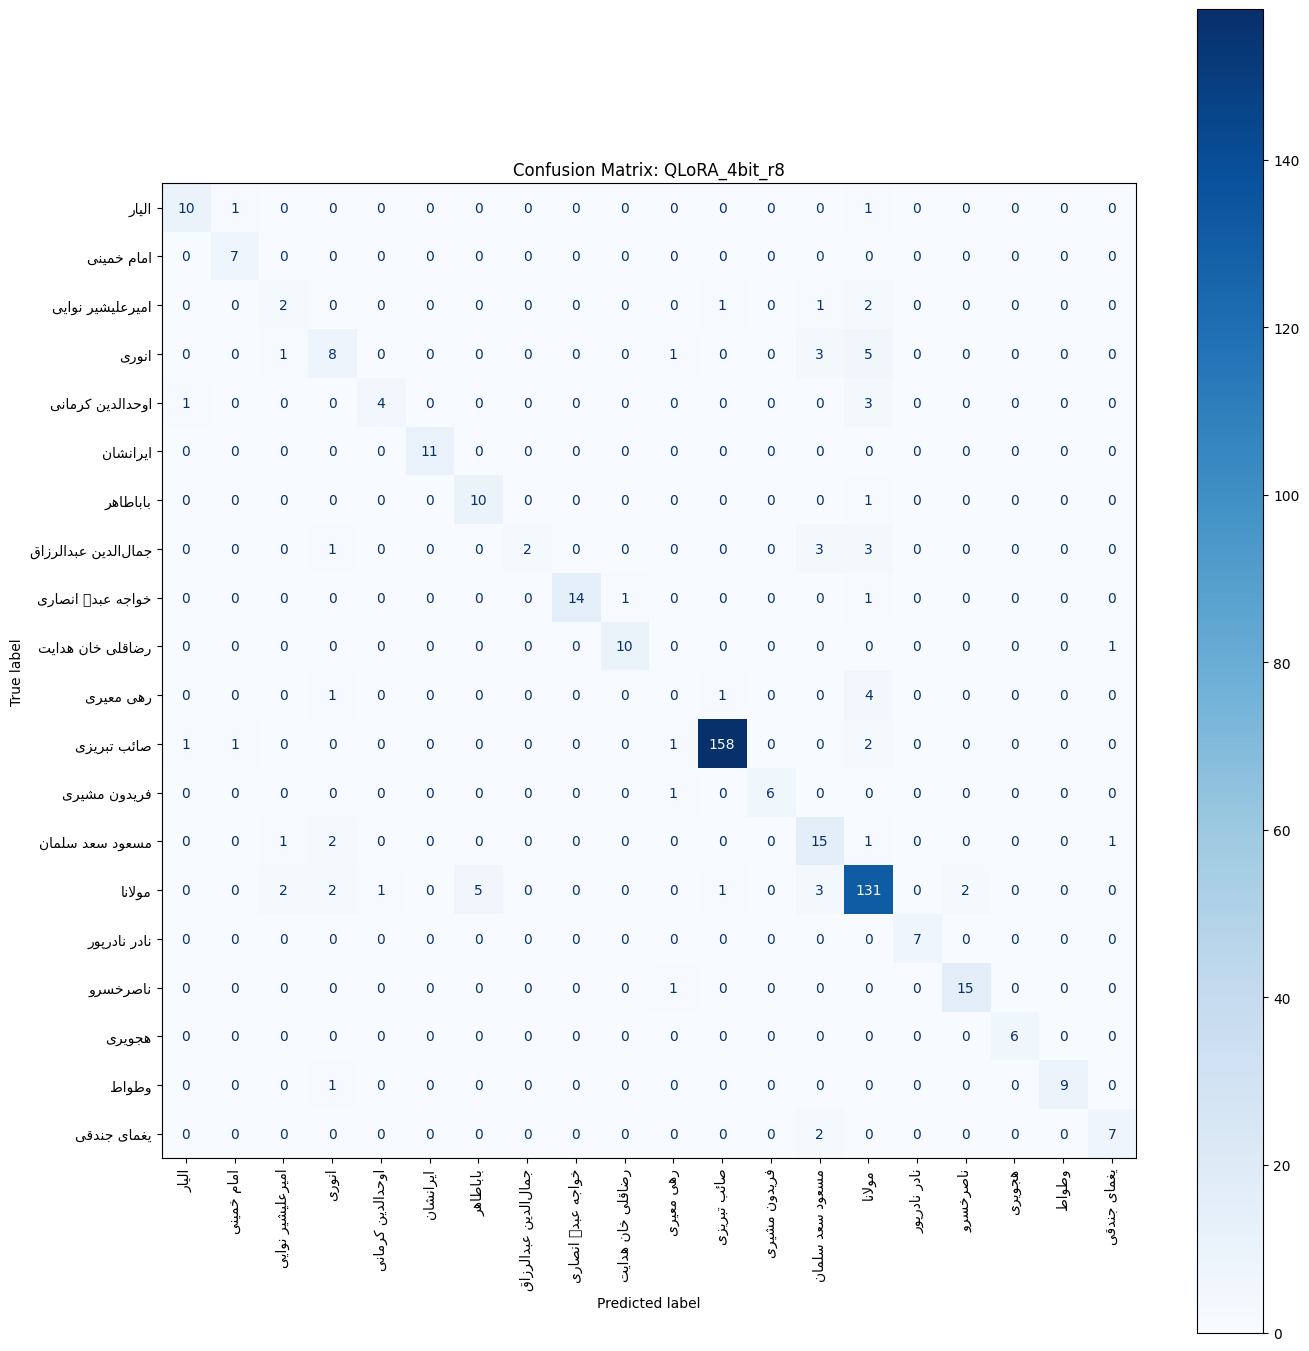

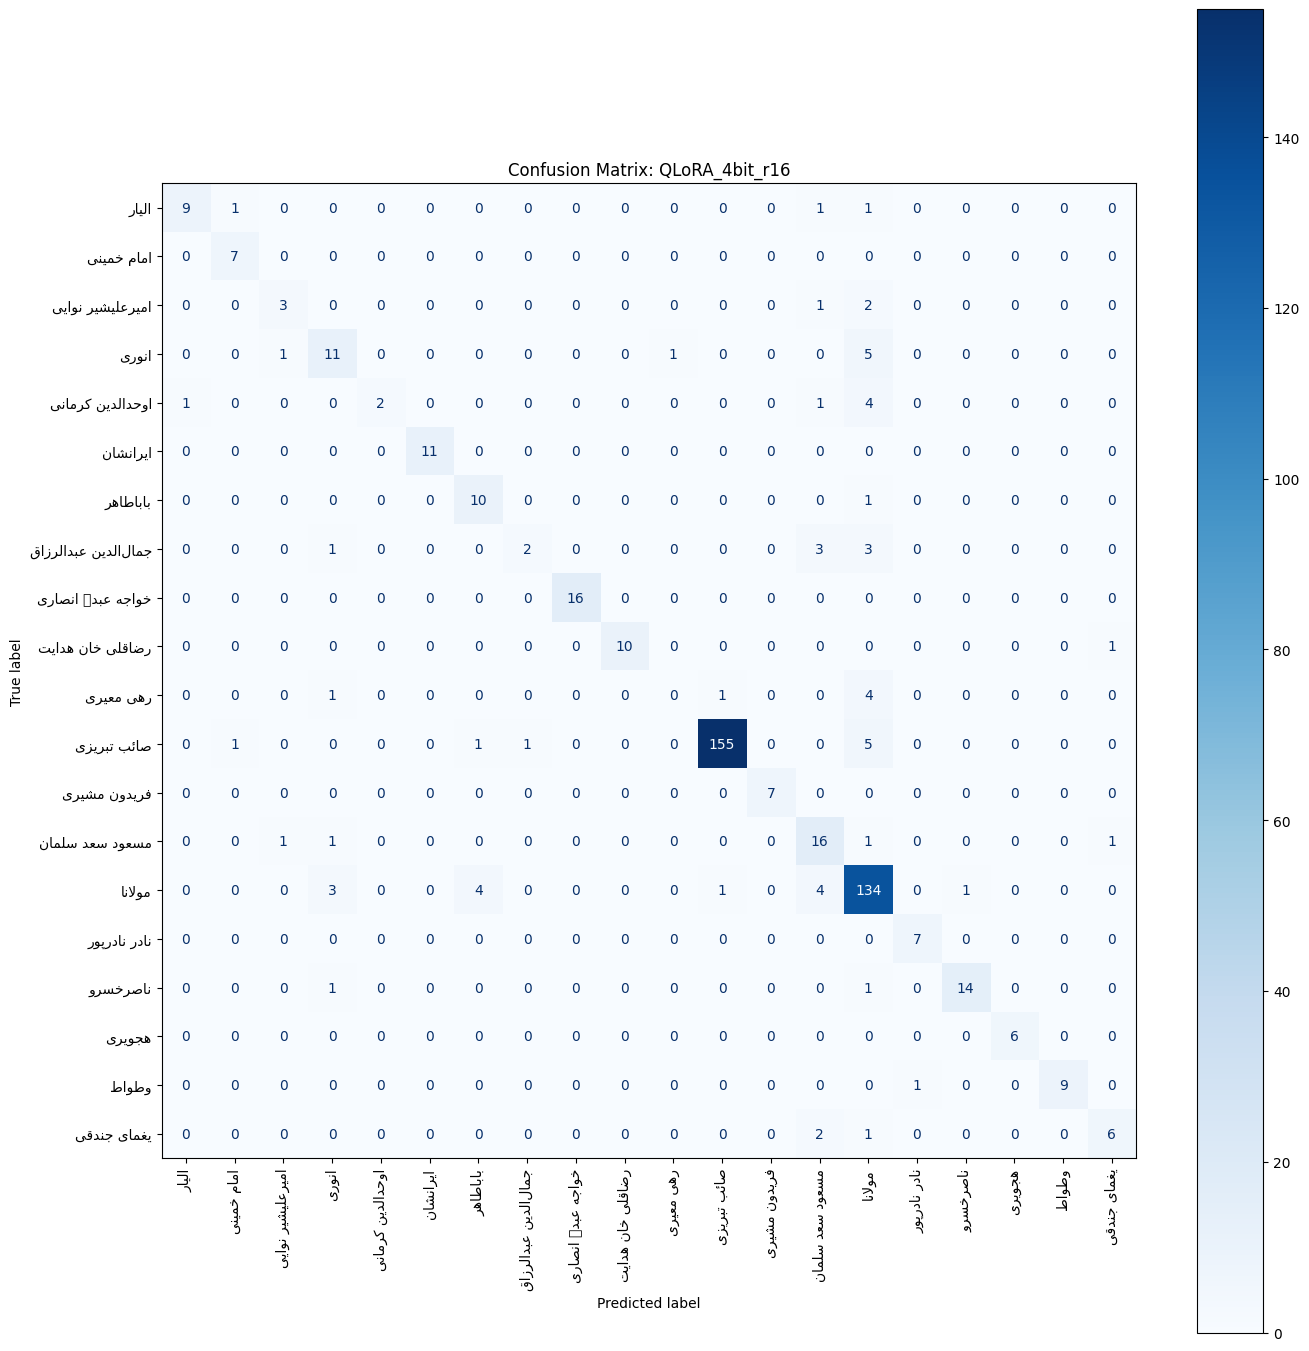

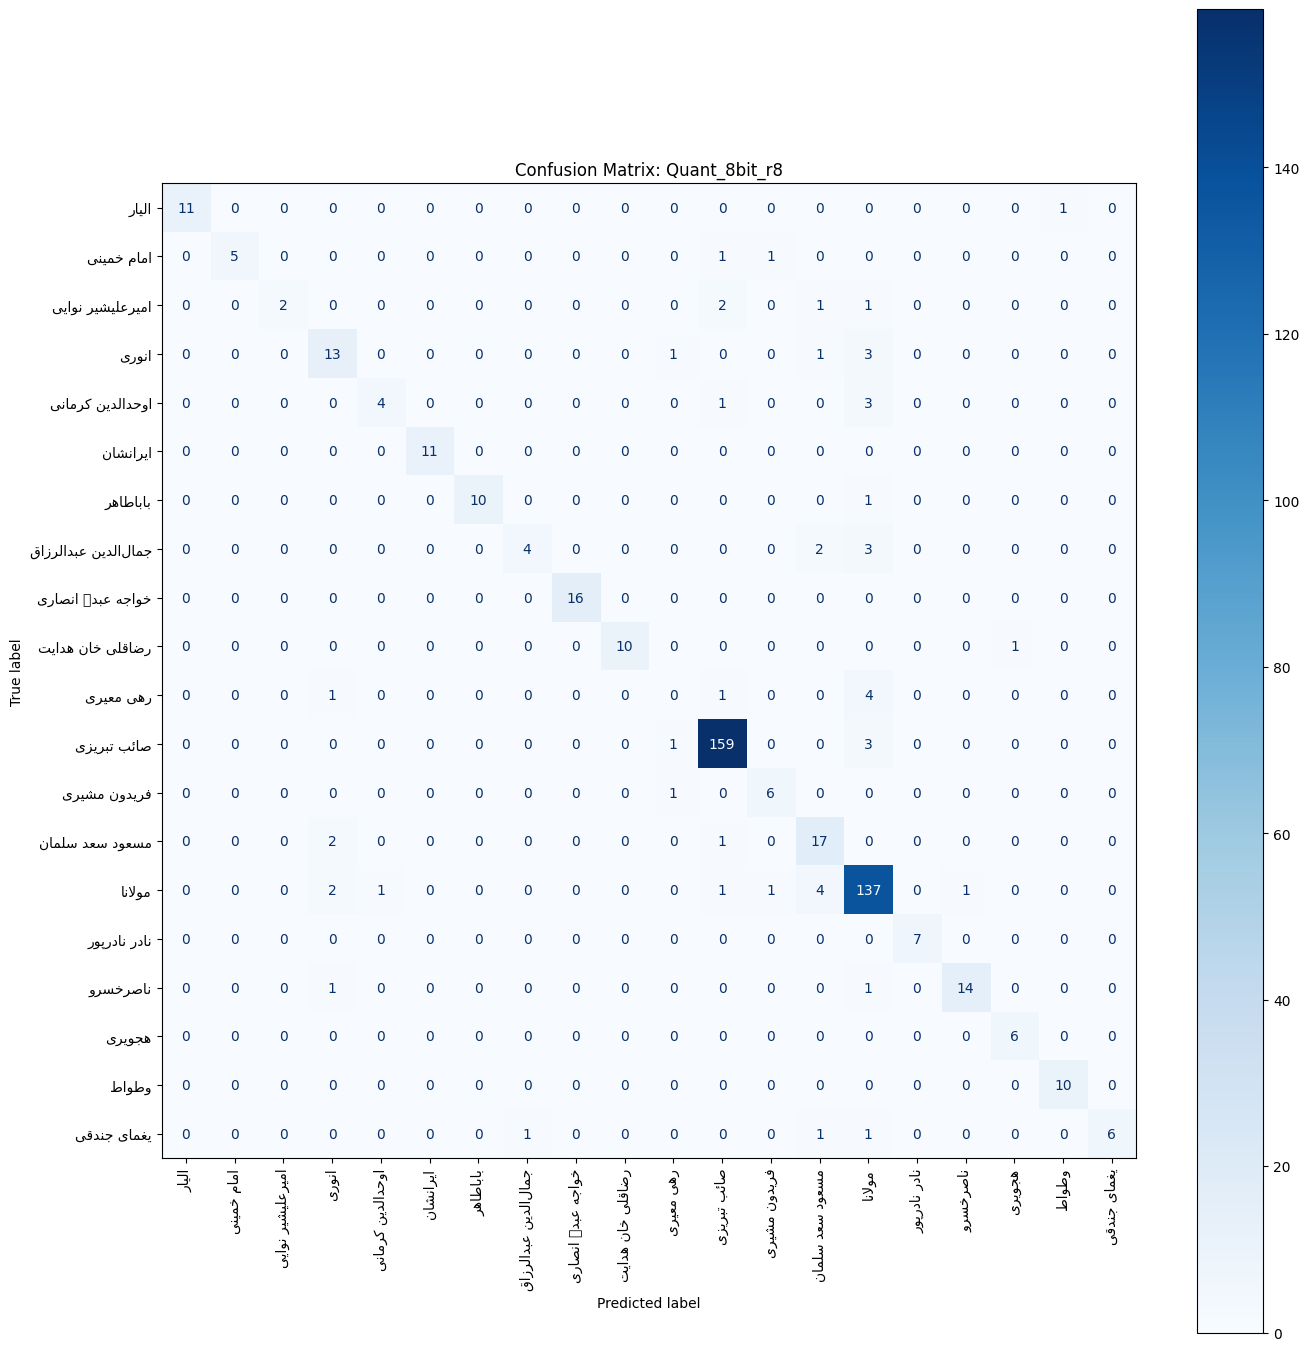

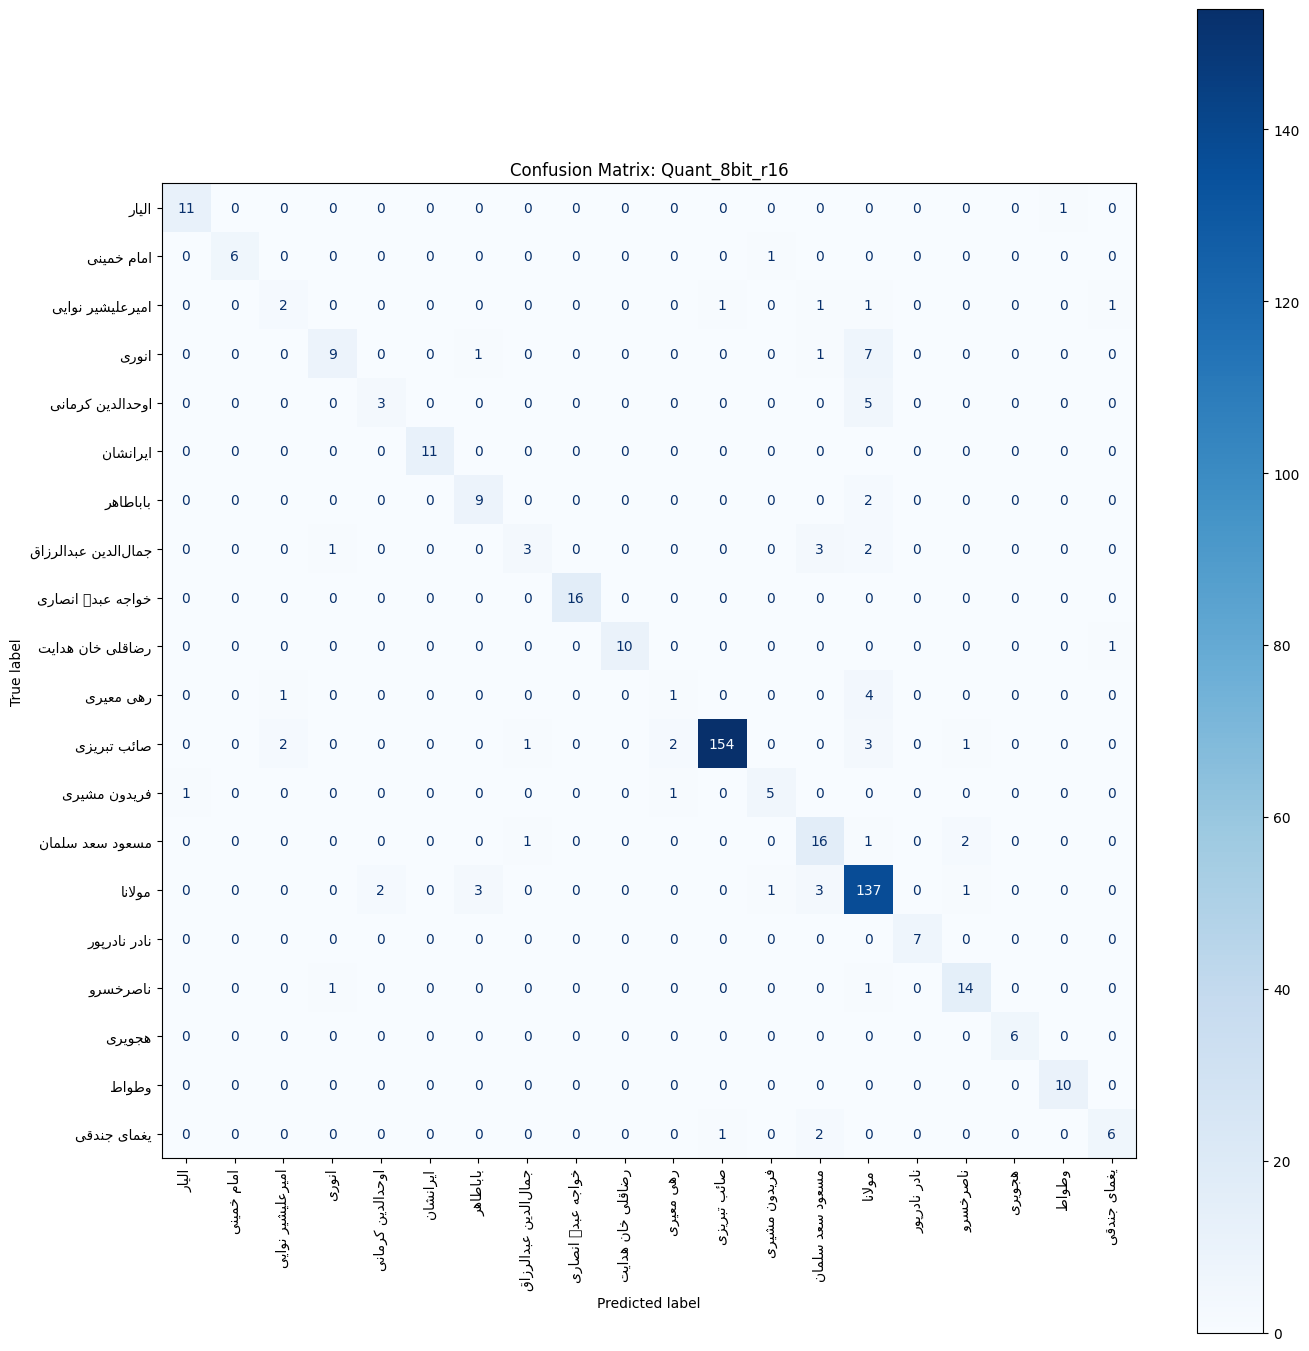

In [7]:
import os
import time
import warnings
from typing import Dict, Any, List

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import arabic_reshaper
from bidi.algorithm import get_display

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay
)
from datasets import Dataset
from transformers import (
    AutoTokenizer,
    AutoConfig,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    DataCollatorWithPadding,
    EarlyStoppingCallback,
    set_seed,
)
from peft import (
    LoraConfig,
    get_peft_model,
    prepare_model_for_kbit_training,
    TaskType
)

# Suppress warnings for cleaner output
warnings.filterwarnings("ignore")

# CONFIGURATION
CONFIG = {
    "model_name": "google/gemma-3-270m",
    "data_path": "LLM_HW2",
    "output_dir_base": "./lora_results",
    "seed": 42,
    "sample_size": 5000,
    "epochs": 5,
    "batch_size": 8,
    "lr": 2e-4,
    "weight_decay": 0.01,
    "warmup_steps": 50,
    "max_length": 512,
    "save_total_limit": 1,
    "lora_alpha": 32,
    "lora_dropout": 0.05,
    "target_modules": ["q_proj", "v_proj", "k_proj", "o_proj"],
}

# DATA UTILITIES

def load_and_prep_data(data_path: str, sample_size: int) -> pd.DataFrame:
    """Loads Train, Test, and Val CSVs, concatenates them, and samples data."""
    if not os.path.exists(data_path):
        # Fallback for manual check (as per original script logic)
        print(f"Warning: {data_path} folder not found immediately.")

    try:
        train = pd.read_csv(os.path.join(data_path, 'Train.csv'))
        test = pd.read_csv(os.path.join(data_path, 'Test.csv'))
        val = pd.read_csv(os.path.join(data_path, 'Val.csv'))

        # Combine all splits as per original logic
        full_df = pd.concat([train, test, val])

        # Sample specific amount
        sampled_df = full_df.sample(sample_size, random_state=CONFIG["seed"])
        print(f"Data loaded successfully. Total rows sampled: {len(sampled_df)}")
        return sampled_df

    except FileNotFoundError:
        print("Error: CSV files not found. Please check the dataset path.")
        exit(1)

def prepare_datasets(df: pd.DataFrame, label_col="poet", text_col="text", test_size=0.1, val_size=0.1):
    """Splits dataframe into HF Datasets and generates label maps."""
    df = df.dropna(subset=[text_col, label_col]).reset_index(drop=True)
    labels = sorted(df[label_col].unique().tolist())

    label2id = {lbl: i for i, lbl in enumerate(labels)}
    id2label = {i: lbl for lbl, i in label2id.items()}

    df["label"] = df[label_col].map(label2id)

    # Stratified split
    train_df, test_df = train_test_split(
        df, test_size=test_size, random_state=CONFIG["seed"], stratify=df["label"]
    )
    # Adjust validation split relative to remaining training data
    train_df, val_df = train_test_split(
        train_df,
        test_size=val_size / (1 - test_size),
        random_state=CONFIG["seed"],
        stratify=train_df["label"]
    )

    # Convert to Hugging Face Datasets
    cols = [text_col, "label"]
    train_ds = Dataset.from_pandas(train_df[cols].rename(columns={text_col: "text"}))
    val_ds = Dataset.from_pandas(val_df[cols].rename(columns={text_col: "text"}))
    test_ds = Dataset.from_pandas(test_df[cols].rename(columns={text_col: "text"}))

    return train_ds, val_ds, test_ds, label2id, id2label

def fix_farsi_text(text):
    """Reshapes Farsi/Arabic text for correct plotting display."""
    if not isinstance(text, str):
        text = str(text)
    reshaped_text = arabic_reshaper.reshape(text)
    bidi_text = get_display(reshaped_text)
    return bidi_text

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    acc = accuracy_score(labels, preds)
    f1_micro = f1_score(labels, preds, average="micro")
    f1_macro = f1_score(labels, preds, average="macro")
    return {"accuracy": acc, "f1_micro": f1_micro, "f1_macro": f1_macro}

# TRAINING PIPELINE
def run_training(df: pd.DataFrame, r_dim: int, use_4bit: bool) -> Dict[str, Any]:
    """
    Runs the full training pipeline.
    use_4bit=True  -> QLoRA (4-bit)
    use_4bit=False -> 8-bit Quantization
    """
    set_seed(CONFIG["seed"])

    # Reset Memory
    if torch.cuda.is_available():
        torch.cuda.empty_cache()
        torch.cuda.reset_peak_memory_stats()

    # Define Method Name based on bit-depth
    method_name = "QLoRA_4bit" if use_4bit else "Quant_8bit"
    run_name = f"{method_name}_r{r_dim}"
    output_dir = os.path.join(CONFIG["output_dir_base"], run_name)
    os.makedirs(output_dir, exist_ok=True)

    print(f"\n{'='*20} Starting Run: {run_name} {'='*20}")

    # 1. Prepare Data
    train_ds, val_ds, test_ds, label2id, id2label = prepare_datasets(df)
    num_labels = len(label2id)

    # 2. Tokenizer & Config
    tokenizer = AutoTokenizer.from_pretrained(CONFIG["model_name"], use_fast=True)
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    config = AutoConfig.from_pretrained(
        CONFIG["model_name"],
        num_labels=num_labels,
        id2label=id2label,
        label2id=label2id
    )

    # 3. Load Model (Quantization Logic)
    device = "cuda" if torch.cuda.is_available() else "cpu"

    # Logic: If use_4bit is True, we use load_in_4bit.
    # If False, we use load_in_8bit .
    if use_4bit and device == "cuda":
        print("--> Loading in 4-bit (QLoRA)...")
        model = AutoModelForSequenceClassification.from_pretrained(
            CONFIG["model_name"],
            config=config,
            load_in_4bit=True,
            device_map="auto",
        )
    else:
        print("--> Loading in 8-bit (Quantized)...")
        model = AutoModelForSequenceClassification.from_pretrained(
            CONFIG["model_name"],
            config=config,
            load_in_8bit=True,
            device_map="auto",
        )

    model = prepare_model_for_kbit_training(model)
    model.config.pad_token_id = tokenizer.pad_token_id

    # 4. Apply LoRA Adapters
    peft_config = LoraConfig(
        r=r_dim,
        lora_alpha=CONFIG["lora_alpha"],
        target_modules=CONFIG["target_modules"],
        lora_dropout=CONFIG["lora_dropout"],
        bias="none",
        task_type=TaskType.SEQ_CLS,
        modules_to_save=["score"]
    )
    model = get_peft_model(model, peft_config)

    print(f"\n[Metrics] Trainable Parameters for {run_name}:")
    model.print_trainable_parameters()
    trainable_params, _ = model.get_nb_trainable_parameters()

    # 5. Tokenization & Collator
    def preprocess_fn(examples):
        return tokenizer(
            examples["text"],
            padding=False,
            truncation=True,
            max_length=CONFIG["max_length"]
        )

    train_ds = train_ds.map(preprocess_fn, batched=True, remove_columns=["text"])
    val_ds = val_ds.map(preprocess_fn, batched=True, remove_columns=["text"])
    test_ds = test_ds.map(preprocess_fn, batched=True, remove_columns=["text"])

    data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

    # 6. Training Arguments
    training_args = TrainingArguments(
        output_dir=output_dir,
        per_device_train_batch_size=CONFIG["batch_size"],
        per_device_eval_batch_size=CONFIG["batch_size"],
        num_train_epochs=CONFIG["epochs"],
        learning_rate=CONFIG["lr"],
        weight_decay=CONFIG["weight_decay"],
        warmup_steps=CONFIG["warmup_steps"],
        eval_strategy="epoch",
        save_strategy="epoch",
        logging_steps=50,
        save_total_limit=CONFIG["save_total_limit"],
        load_best_model_at_end=True,
        metric_for_best_model="eval_f1_micro",
        fp16=(device == "cuda"),
        report_to="none",
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_ds,
        eval_dataset=val_ds,
        tokenizer=tokenizer,
        data_collator=data_collator,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=1)]
    )

    # 7. Execute Training
    print("Starting training...")
    start_time = time.time()
    trainer.train()
    end_time = time.time()
    training_duration = end_time - start_time

    # Memory Tracking
    max_memory_gb = 0.0
    if device == "cuda":
        max_memory_bytes = torch.cuda.max_memory_allocated()
        max_memory_gb = max_memory_bytes / (1024 ** 3)

    print(f"\n[Metrics] Training Finished.")
    print(f"Time Taken: {training_duration:.2f} seconds")
    print(f"Max Memory Allocated: {max_memory_gb:.2f} GB")

    # 8. Evaluation & Visualization
    print("Evaluating on test set...")
    predictions_output = trainer.predict(test_ds)
    y_pred = np.argmax(predictions_output.predictions, axis=1)
    y_true = predictions_output.label_ids
    test_metrics = predictions_output.metrics
    print("Test Metrics:", test_metrics)

    # Confusion Matrix Plot
    cm = confusion_matrix(y_true, y_pred)
    raw_labels = [id2label[i] for i in range(num_labels)]
    display_labels = [fix_farsi_text(label) for label in raw_labels]

    fig, ax = plt.subplots(figsize=(14, 14))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='vertical')
    plt.title(f"Confusion Matrix: {run_name}")
    plt.tight_layout()

    plot_path = os.path.join(output_dir, "confusion_matrix.png")
    plt.savefig(plot_path)
    print(f"Confusion matrix saved to {plot_path}")
    # plt.show()

    # Cleanup
    del model
    del trainer
    torch.cuda.empty_cache()

    return {
        "method": method_name,
        "r": r_dim,
        "trainable_params": trainable_params,
        "training_time_sec": training_duration,
        "max_memory_gb": max_memory_gb,
        "test_f1": test_metrics.get("test_f1_micro")
    }

# MAIN EXECUTION

if __name__ == "__main__":
    # 1. Load Data
    global_df = load_and_prep_data(CONFIG["data_path"], CONFIG["sample_size"])

    # 2. Define Experiments
    results_summary = []

    # Configurations:
    # use_4bit=True  -> QLoRA (4-bit)
    # use_4bit=False -> Quantized (8-bit)
    configurations = [
        {"use_4bit": True, "r": 8},
        {"use_4bit": True, "r": 16},
        {"use_4bit": False, "r": 8},
        {"use_4bit": False, "r": 16}
    ]

    # 3. Run Experiments
    for conf in configurations:
        res = run_training(
            global_df,
            r_dim=conf["r"],
            use_4bit=conf["use_4bit"]
        )
        results_summary.append(res)

    # 4. Final Report
    print("\n" + "="*50)
    print("FINAL SUMMARY REPORT")
    print("="*50)
    summary_df = pd.DataFrame(results_summary)
    print(summary_df)

    summary_df.to_csv("fine_tuning_benchmark_results.csv", index=False)